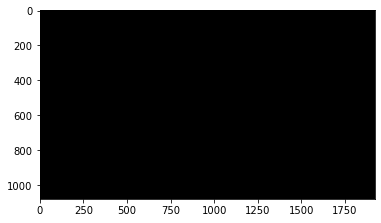

There are 0 set to 255


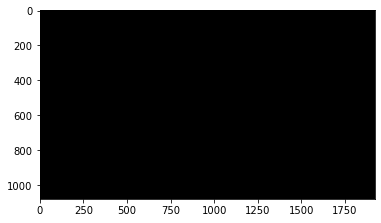

There are 0 set to 255


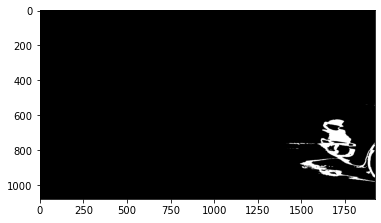

There are 35908 set to 255


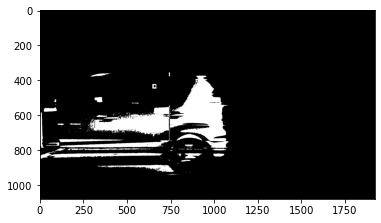

There are 159967 set to 255


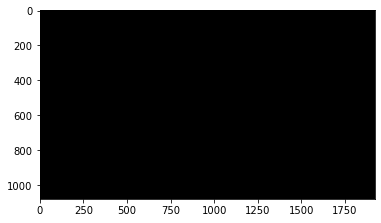

There are 0 set to 255


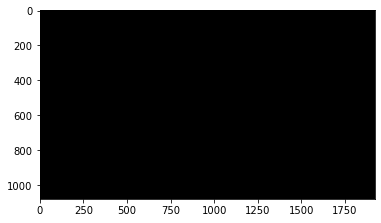

There are 0 set to 255


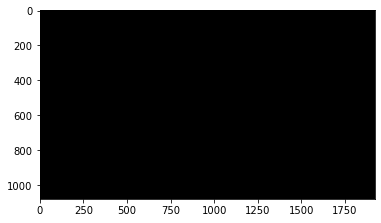

There are 0 set to 255


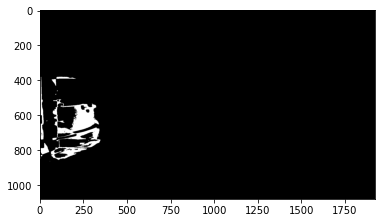

There are 42814 set to 255


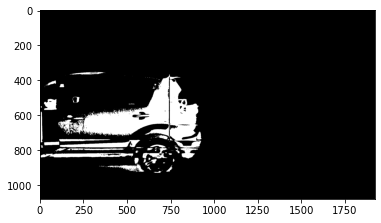

There are 168842 set to 255


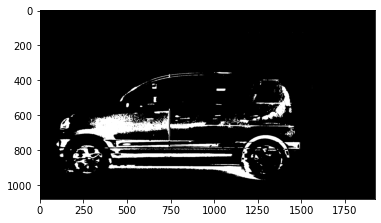

There are 142566 set to 255


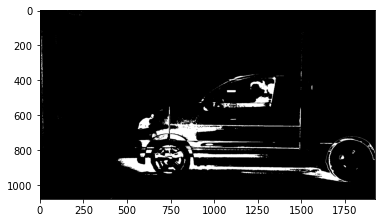

There are 106705 set to 255


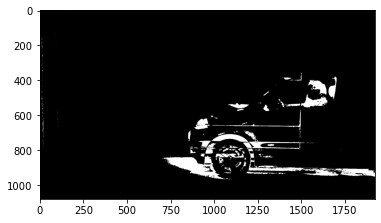

There are 86879 set to 255


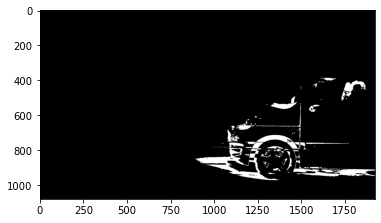

There are 67630 set to 255


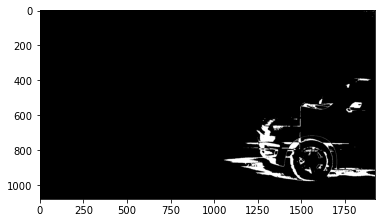

There are 53628 set to 255


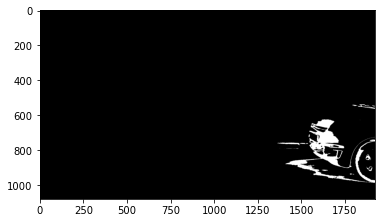

There are 38665 set to 255


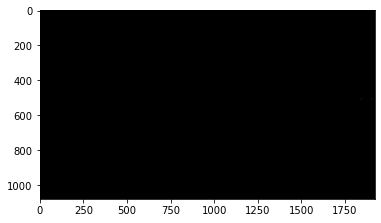

There are 11 set to 255


In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

bg_car_threshold = 55

cap = cv2.VideoCapture('../datasets/daihatsu_side.MOV') # capture


count = 0 # frames passed
index = 0 # iteration
bg = None # Background for substraction

x = [] # frames
y = [] # save results for every iteration

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        count += 30 # i.e. at 30 fps, this advances one second
        
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to gray
        img = cv2.cv2.equalizeHist(img) # Equalize Histogram

        if bg is None:
            bg = img # start of the video set background

        # difference between background and frame
        img_diff = bg + bg_car_threshold - img

        (T, thresh) = cv2.threshold(img_diff, 180, 255, cv2.THRESH_BINARY)
        # display image
        plt.imshow(thresh, cmap='gray')
        plt.show()
        # count non zero pixels
        nonzero = np.count_nonzero(thresh)
        print(f'There are {nonzero} set to 255')

        if nonzero == 0:
            bg = img

        # save values for plotting
        x.append(count)
        y.append(nonzero)
        
        cap.set(1, count) # advance by 30 fps
        index += 1 # add to index
    else:
        cap.release()
        break

## Display Results

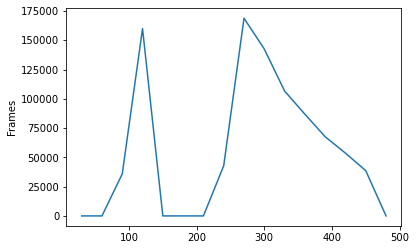

In [14]:
plt.plot(x, y)
plt.ylabel('Non Zero Pixel Count')
plt.ylabel('Frames')
plt.show()

## Interpret Diagramm

In [16]:
peaks, _ = find_peaks(y) # Number of maximas

print(f'{len(peaks)} vehicles have passed through the screen')
for index, peak in enumerate(peaks):
    value = y[peak]
    if value > 125e3 and value <= 180e3:
        print(f'The {index + 1} vehicle must have been a small car')
    if value > 180e3 and value <= 210e3:
        print(f'The {index + 1} vehicle must have been a car')
    if value > 210e3:
        print(f'The {index + 1} vehicle must have been a van')

2 vehicles have passed through the screen
The 1 vehicle must have been a small car
The 2 vehicle must have been a small car
